In [1]:
%matplotlib inline

from utils import *
from pycaret.regression import*
from pycaret.datasets import get_data 

In [2]:
def get_data(dataset_name, file_names_range, target, features, win_size=None, step_size_ratio=1):
    
    dataset_df = pd.DataFrame()        
    for n in file_names_range:        
        file_path = get_dataset_file_path(dataset_name, 'record_'+"{0:0=2d}".format(n)) 
        data = pd.read_pickle( file_path )  
        target_df = data.filter(regex=target, axis=1)
        features_df = data.filter(regex=features, axis=1)

        if win_size is not None:
            data_df = pd.DataFrame()    
            step_size = int(step_size_ratio * win_size)
                
            for i in range(0, len(features_df)- win_size, step_size):
                row = { target: target_df.loc[i+win_size-1, target]}
                
                for feature_name in features_df.columns: 
                    for j in range(win_size):
                        row.update({ feature_name + "{0:0=2d}".format(j): features_df.loc[i+j, feature_name] })
                data_df = data_df.append(row, ignore_index=True)
        else:
            data_df = pd.concat([features_df, target_df], axis=1)
        
        dataset_df = dataset_df.append(data_df, ignore_index=True)
    
    dataset_df = dataset_df.rename({target:'target'}, axis=1)
    return dataset_df

# Data

#### Load Data

In [34]:
dataset_name = 'dataset_01' 
target = 'distance_1' 
features = 'rssi' 
win_size = None
step_size_ratio = 1

# Tarining
file_names_range = np.arange(20)
data = get_data( dataset_name, file_names_range, target, features, win_size=win_size, step_size_ratio=step_size_ratio )

# Test
file_names_range = np.arange(20,25)
data_unseen = get_data( dataset_name, file_names_range, target, features, win_size=win_size, step_size_ratio=step_size_ratio )

display(data)

,rssi_0,rssi_1,target
0,111.818182,143.727273,0.260033
1,111.818182,143.727273,0.260033
2,111.818182,143.727273,0.260033
3,111.818182,143.727273,0.260033
4,111.818182,143.727273,0.260033
...,...,...,...
7719,81.090909,126.181818,0.270657
7720,81.636364,128.818182,0.269414
7721,82.181818,131.454545,0.268346
7722,82.727273,134.090909,0.267059


# Regression

In [45]:
exp_reg = setup(data,
#                 train_size = .9,
                target = 'target', 
#                 normalize = True, 
                session_id = 20
                )   

 
Setup Succesfully Completed!


,Description,Value
0,session_id,20
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(7724, 3)"
4,Missing Values,False
5,Numeric Features,2
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


#### Model

In [46]:
model = tune_model('lightgbm')
# model = create_model('rf')

NRMSE = round(exp_reg[-1][-1][-1].RMSE.Mean / np.mean(data.target) * 100, 2)
print(NRMSE)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0321,0.0018,0.0426,0.8653,0.0318,0.1063
1,0.0349,0.0022,0.0473,0.8338,0.0351,0.1149
2,0.0347,0.0021,0.0455,0.8518,0.0340,0.1148
3,0.0362,0.0024,0.0492,0.8035,0.0367,0.1213
4,0.0326,0.0018,0.0425,0.8596,0.0315,0.1050
5,0.0327,0.0018,0.0424,0.8589,0.0313,0.1011
6,0.0370,0.0025,0.0499,0.8155,0.0369,0.1205
7,0.0331,0.0021,0.0454,0.8408,0.0334,0.1055
8,0.0328,0.0019,0.0433,0.8635,0.0322,0.1074
9,0.0339,0.0021,0.0456,0.8390,0.0340,0.1134


13.03


In [10]:
# plot_model(model, plot='error')
# plot_model(model, plot='feature')

#### Test

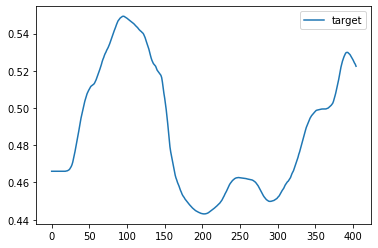

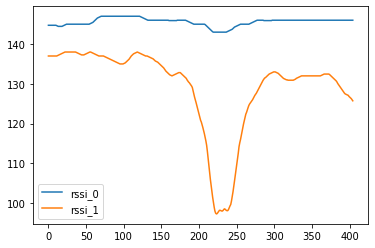

In [68]:
data_unseen = get_data( dataset_name, [7], target, features, win_size=win_size, step_size_ratio=step_size_ratio )
data_unseen.plot(y='target')
ax = data_unseen.plot(y='rssi_0')
data_unseen.plot(y='rssi_1', ax=ax)

# prediction = predict_model(model, data=data_unseen)

# window_length = 17
# labels = prediction.Label
# labels = labels.rolling(window_length, axis=0).mean()    # Smoothing
# labels = labels.ffill(axis=0).bfill(axis=0)              # Gap Filling
    
# ax = prediction.plot(y='target')
# labels.plot(y='Label', ax=ax)
# data_unseen.plot(y='rssi_1')
plt.show()


In [ ]:
# save_experiment(get_result_file_path('res_00'))

#### Compare Regressors

In [14]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,0.031300,0.001900,0.043900,0.761700,0.031300,0.082200
1,CatBoost Regressor,0.032400,0.001900,0.044100,0.759900,0.031400,0.085100
2,Random Forest,0.028000,0.002000,0.044800,0.751900,0.031800,0.072900
3,Extra Trees Regressor,0.028800,0.002100,0.046300,0.735300,0.032900,0.075000
4,K Neighbors Regressor,0.029800,0.002200,0.046500,0.731700,0.033200,0.078400
5,Extreme Gradient Boosting,0.037200,0.002500,0.049700,0.694600,0.035500,0.098700
6,Gradient Boosting Regressor,0.037300,0.002500,0.049900,0.693100,0.035600,0.098900
7,Decision Tree,0.030200,0.002900,0.053500,0.644800,0.038100,0.078400
8,AdaBoost Regressor,0.045300,0.003300,0.057400,0.594300,0.040900,0.119300
9,Support Vector Machine,0.048400,0.003500,0.059400,0.565700,0.042500,0.130300


#### Hyperparameter Tuning for Window-Sliding:

In [ ]:
def test(win_size, step_size_ratio)
    data = get_data(
        dataset_name = 'dataset_01', 
        file_names_range = np.arange(20), 
        target = 'distance_0', 
        features = 'rssi', 
        win_size = win_size, 
        step_size_ratio = step_size_ratio)

    exp_reg = setup(data, 
              target = 'target', 
              normalize = True, 
              session_id = 100)   

    model = tune_model('rf')
    model_rmse = exp_reg[9][8][1].RMSE.Mean
    return model_rmse

In [70]:
best_result = dict( win_size=None, step_size_ratio=None)
min_rmse = test(None, None)

for win_size in [10, 20]:
    for step_size_ratio in [.25, .5, .75, 1]:
        test(win_size, step_size_ratio)
        if model_rmse < min_rmse: best_result.update({'win_size':win_size, 'step_size_ratio':step_size_ratio})

print(best_result)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0403,0.0031,0.0554,0.5275,0.0387,0.0970
1,0.0491,0.0038,0.0620,0.5753,0.0456,0.1530
2,0.0483,0.0043,0.0656,0.2679,0.0471,0.1341
3,0.0483,0.0037,0.0606,0.5677,0.0433,0.1282
4,0.0497,0.0047,0.0683,0.4076,0.0498,0.1485
5,0.0486,0.0038,0.0617,0.4269,0.0443,0.1279
6,0.0336,0.0020,0.0452,0.7171,0.0317,0.0837
7,0.0497,0.0050,0.0704,0.4416,0.0491,0.1148
8,0.0374,0.0022,0.0469,0.6599,0.0324,0.0863
9,0.0418,0.0028,0.0525,0.5632,0.0377,0.1116
